In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("taitanic.csv")

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Missing Values**

In [6]:
df.isna().sum()  # or df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df[["Sex", "Survived"]].groupby(["Sex"], as_index= False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


C:\Users\Hediye\AppData\Local\Temp\ipykernel_7948\2123934508.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data= df, x= "Sex", y= "Survived", kind= "bar", height= 3, palette= "mako")


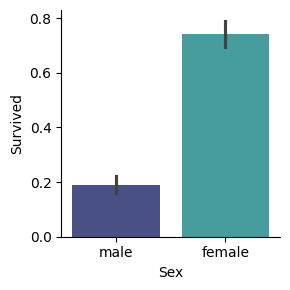

In [8]:
sns.catplot(data= df, x= "Sex", y= "Survived", kind= "bar", height= 3, palette= "mako")

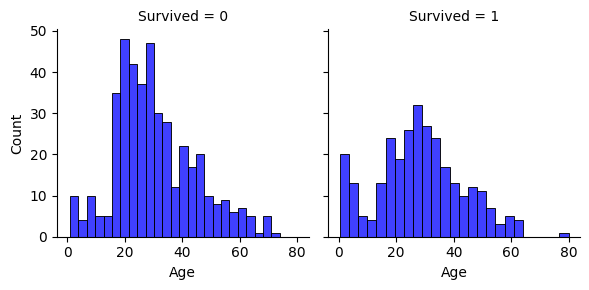

In [9]:
sns.FacetGrid(df, col= "Survived").map(sns.histplot, "Age", bins= 25, color= "b")

<Axes: xlabel='PassengerId', ylabel='Age'>

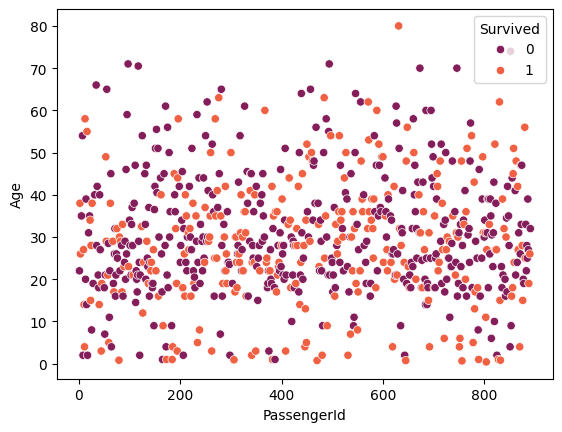

In [10]:
sns.scatterplot(x= df.PassengerId, y= df["Age"], hue= df["Survived"], palette= "rocket")

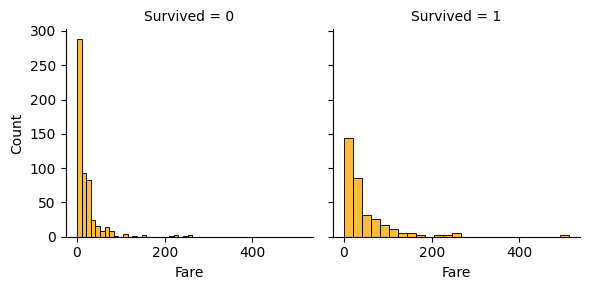

In [11]:
sns.FacetGrid(df, col= "Survived").map(sns.histplot, "Fare", bins= 25, color= "orange")

<Axes: xlabel='Fare', ylabel='Age'>

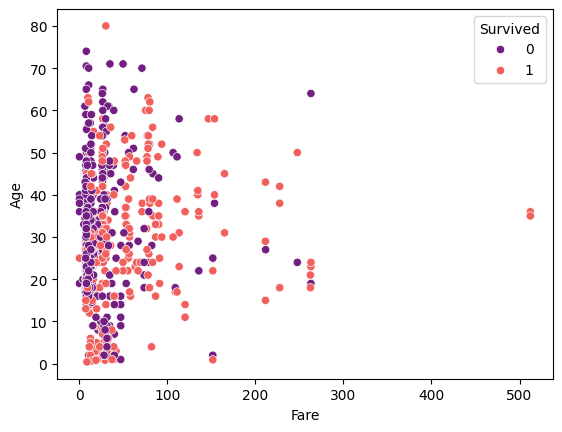

In [12]:
sns.scatterplot(x = df.Fare, y = df["Age"], hue = df["Survived"], palette= "magma")

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7948\1597133572.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data= df, x= "Pclass", y = "Survived", kind= "bar", height= 3, palette= "viridis")


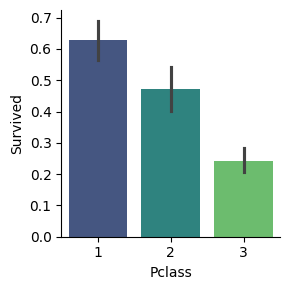

In [13]:
sns.catplot(data= df, x= "Pclass", y = "Survived", kind= "bar", height= 3, palette= "viridis")

<Axes: xlabel='Survived', ylabel='count'>

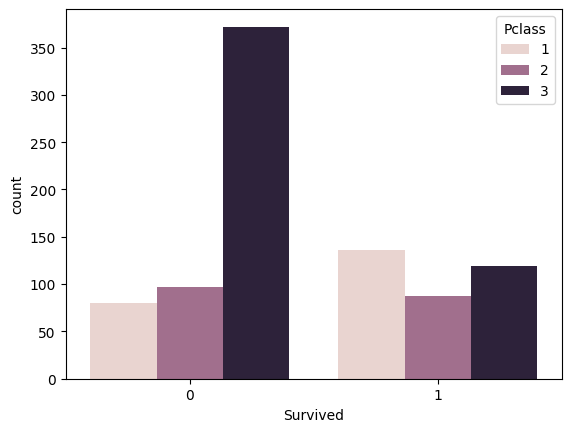

In [14]:
sns.countplot(data=df, x= "Survived", hue= "Pclass")

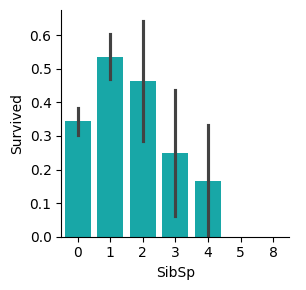

In [15]:
sns.catplot(data=df, x= "SibSp", y = "Survived", kind= "bar", height= 3, color= "c")

In [16]:
df[["Parch", "Survived"]].groupby(["Parch"], as_index = False).agg(["count", "mean"])

Parch Survived          
           count      mean
0     0      678  0.343658
1     1      118  0.550847
2     2       80  0.500000
3     3        5  0.600000
4     4        4  0.000000
5     5        5  0.200000
6     6        1  0.000000

In [17]:
df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).agg(["count", "mean"])

Embarked Survived          
              count      mean
0        C      168  0.553571
1        Q       77  0.389610
2        S      644  0.336957

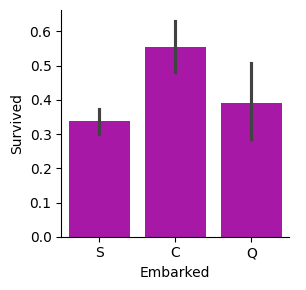

In [18]:
sns.catplot(data= df, x= "Embarked", y ="Survived", kind= "bar", height= 3, color= "m")

In [19]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins= True).style.background_gradient(cmap= "summer_r")

In [20]:
pd.crosstab([df.Embarked, df.Pclass], [df.Sex, df.Survived], margins= True).style.background_gradient(cmap= "summer_r")

**Transformation to Features**

In [21]:
genders = {"male": 0, 
           "female": 1}
data = [df]

for dataset in data:
    dataset["Sex"] = dataset["Sex"].map(genders)

In [22]:
df.Sex.unique()

array([0, 1], dtype=int64)

In [23]:
embark = {"S": 0, 
          "C": 1, 
          "Q": 2}
data = [df]

for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].map(embark)

In [24]:
df.Embarked.unique()

array([ 0.,  1.,  2., nan])

In [25]:
data = [df]

for dataset in data:
    dataset["Fare"] = dataset["Fare"].fillna(0)
    dataset["Fare"] = dataset["Fare"].astype(int)

In [26]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8,NaN,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13,NaN,0.0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7,NaN,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7,NaN,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",0,NaN,0,0,2629,7,NaN,1.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69,NaN,0.0
868,869,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,9,NaN,0.0
878,879,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,349217,7,NaN,0.0
